<a href="https://colab.research.google.com/github/blackgreenc/AI/blob/main/school_project123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
!pip install yfinance
import yfinance as yf #야후 파이낸스 데이터
import datetime

     |████████████████████████████████| 6.3 MB 10.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=1d9fb8e6fab8bfeb5a916a67a29b2406a1c15248e5827c13f8e5c7d0147c004b
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


There are0observations in the training data
There are2219observations in the training data


,Adj Close,Open,High,Low,Close,Volume
Date,,,,,,
2013-01-02,16.99,19.78,19.82,19.34,19.61,560518000
2013-01-03,16.77,19.57,19.63,19.32,19.36,352965200
2013-01-04,16.30,19.18,19.24,18.78,18.82,594333600
2013-01-07,16.21,18.64,18.90,18.40,18.71,484156400
2013-01-08,16.25,18.90,19.00,18.62,18.76,458707200
2013-01-09,16.00,18.66,18.75,18.43,18.47,407604400
2013-01-10,16.20,18.88,18.88,18.41,18.70,601146000
2013-01-11,16.10,18.61,18.76,18.54,18.58,350506800
2013-01-14,15.52,17.95,18.12,17.80,17.92,734207600


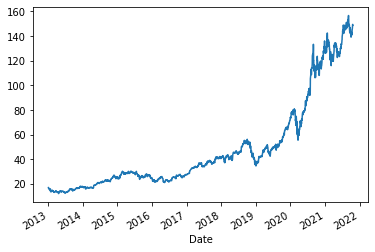

In [30]:
# 나스닥 100
AAPL  = yf.download('AAPL',
                     start = '2013-01-01',
                     end = '2021-10-25',
                     progress = False)

data = AAPL[['Adj Close', 'Open', 'High', 'Low', "Close","Volume"]].round(2)

print("There are" + str(data[:"2007"].shape[0]) + "observations in the training data")
print("There are" + str(data[:"2021"].shape[0]) + "observations in the training data")


data['Adj Close'].plot()
data.shape
data.head(10)

In [31]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [32]:
seq_len = 30
sequence_length = seq_len + 1
,
result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [33]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1969, 30, 1), (219, 30, 1))

In [34]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=50)

Epoch 1/50
197/197 [==============================] - 11s 36ms/step - loss: 0.0013 - val_loss: 5.4481e-04
Epoch 2/50
197/197 [==============================] - 6s 32ms/step - loss: 5.3324e-04 - val_loss: 3.3456e-04
Epoch 3/50
197/197 [==============================] - 6s 33ms/step - loss: 3.7192e-04 - val_loss: 4.1708e-04
Epoch 4/50
197/197 [==============================] - 6s 32ms/step - loss: 3.0081e-04 - val_loss: 2.0825e-04
Epoch 5/50
197/197 [==============================] - 6s 32ms/step - loss: 2.6823e-04 - val_loss: 1.9660e-04
Epoch 6/50
197/197 [==============================] - 6s 32ms/step - loss: 2.7311e-04 - val_loss: 2.4063e-04
Epoch 7/50
197/197 [==============================] - 6s 32ms/step - loss: 2.6261e-04 - val_loss: 2.0881e-04
Epoch 8/50
197/197 [==============================] - 6s 33ms/step - loss: 2.5807e-04 - val_loss: 2.0027e-04
Epoch 9/50
197/197 [==============================] - 6s 32ms/step - loss: 2.5596e-04 - val_loss: 2.0414e-04
Epoch 10/50
197/197 [=

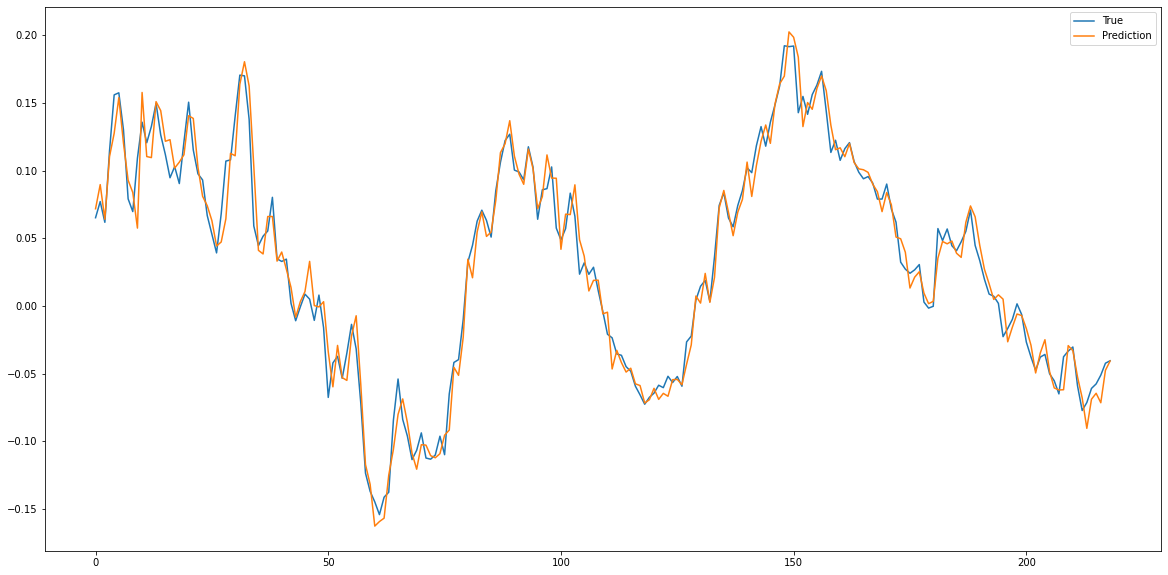

In [36]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()